In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical  
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.utils.np_utils import to_categorical 
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [17]:
train_set_0 = pd.read_csv('0.csv')    # reading the csv file
train_set_0.head()
train_set_1 = pd.read_csv('1.csv')    # reading the csv file
train_set_1.head()

,Unnamed: 0,image_name,target
0,0,ISIC_0000002.jpg.jpg,1
1,1,ISIC_0000004.jpg.jpg,1
2,2,ISIC_0000026.jpg.jpg,1
3,3,ISIC_0000029.jpg.jpg,1
4,4,ISIC_0000030.jpg.jpg,1


In [18]:
from tqdm import tqdm
from keras.preprocessing import image
from PIL import Image
import tensorflow as tf

train_image = []

for i in tqdm(range(train_set_0.shape[0])):
    img = tf.keras.utils.load_img('0/' + train_set_0['image_name'][i],target_size=(224,224,3))
    img = tf.keras.utils.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|██████████████████████████████████████| 2233/2233 [00:02<00:00, 821.97it/s]


In [19]:
from tqdm import tqdm
from keras.preprocessing import image
from PIL import Image
import tensorflow as tf

train_image = []

for i in tqdm(range(train_set_1.shape[0])):
    img = tf.keras.utils.load_img('1/' + train_set_1['image_name'][i],target_size=(224,224,3))
    img = tf.keras.utils.img_to_array(img)
    img = img/255
    train_image.append(img)

Y = np.array(train_image)

100%|██████████████████████████████████████| 1872/1872 [00:02<00:00, 835.13it/s]


In [20]:
y_0=train_set_0['target']
y_1=train_set_1['target']



In [21]:
from sklearn.model_selection import train_test_split
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X,y_0, train_size=0.70,random_state = 42, shuffle = True)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(Y,y_1, train_size=0.70,random_state = 42, shuffle = True)

In [22]:
X_train = np.concatenate((X_0_train,X_1_train))
y_train = np.concatenate((y_0_train,y_1_train))
X_test = np.concatenate((X_0_test,X_1_test))
y_test= np.concatenate((y_0_test,y_1_test))

In [23]:
X_train_x, X_valid, y_train_x, y_valid = train_test_split(X_train,y_train, test_size=0.15,random_state = 42, shuffle = True)

In [24]:
print(X_valid.shape), print(y_valid.shape)
print(X_train_x.shape), print(y_train_x.shape)

(431, 224, 224, 3)
(431,)
(2442, 224, 224, 3)
(2442,)


(None, None)

In [25]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range 
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally 
        height_shift_range=0.1,  # randomly shift images vertically 
        ) 

datagen.fit(X_train_x)

In [26]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, MaxPool2D
from keras.layers.core import Lambda
from keras.layers import *
from keras.models import Model
import keras.backend as K
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import datasets,models, losses
from keras.layers import Conv2D, MaxPool2D, Input, ZeroPadding2D
import os

def Global_attention_block(inputs):
    
    shape=K.int_shape(inputs)
    x=AveragePooling2D(pool_size=(shape[1],shape[2])) (inputs)
    x=Conv2D(shape[3],1, padding='same') (x)
    x=Activation('relu') (x)
    x=Conv2D(shape[3],1, padding='same') (x)
    x=Activation('sigmoid') (x)
    C_A=Multiply()([x,inputs])
    
    x=Lambda(lambda x: K.mean(x,axis=-1,keepdims=True))  (C_A)
    x=Activation('sigmoid') (x)
    S_A=Multiply()([x,C_A])
    
    return S_A

In [27]:
def define_model():
    img_inputs = keras.Input(shape=(224, 224, 3))

    conv_0 = Conv2D(16,3,strides=(1, 1), padding='same')
    x = conv_0(img_inputs) 
    conv_0 = Conv2D(16,3,strides=(1, 1), padding='same')(x)
    max_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding = 'same')(conv_0)

    #block 1

    conv_1 = Conv2D(16,1,strides=(1, 1), padding='same')(max_1)
    bn = tf.keras.layers.BatchNormalization()(conv_1)
    act_1 = tf.keras.layers.ReLU()(bn)

    conv_2 = Conv2D(16,3,strides=(1, 1), padding='same')(max_1)
    bn = tf.keras.layers.BatchNormalization()(conv_2)
    act_2 = tf.keras.layers.ReLU()(bn)

    conv_3 = Conv2D(16,3,strides=(1, 1), padding='same')(max_1)
    bn = tf.keras.layers.BatchNormalization()(conv_2)
    act_3 = tf.keras.layers.ReLU()(bn)

    conv_3 = Conv2D(16,3,strides=(1, 1), padding='same')(act_3)
    bn = tf.keras.layers.BatchNormalization()(conv_3)
    act_3_1 = tf.keras.layers.ReLU()(bn)

    conv_4 = Conv2D(16,3,strides=(1, 1), padding='same')(max_1)
    bn = tf.keras.layers.BatchNormalization()(conv_4)
    act_4 = tf.keras.layers.ReLU()(bn)

    conc_1 = tf.keras.layers.Concatenate(axis = -1)([act_2,act_3_1])
    conc_1 = Conv2D(16,1,strides=(1, 1), padding='same')(conc_1)
    bn = tf.keras.layers.BatchNormalization()(conc_1)
    act_conc_1 = tf.keras.layers.ReLU()(bn)

    conc_1 = Conv2D(16,3,strides=(1, 1), padding='same')(act_conc_1)
    bn = tf.keras.layers.BatchNormalization()(conc_1)
    act_conc_2 = tf.keras.layers.ReLU()(bn)

    conc_2 = tf.keras.layers.Concatenate(axis = -1)([act_1,act_conc_2,act_4])
    conv_3 = Conv2D(16,1,strides=(1, 1), padding='same')(conc_2)
    bn = tf.keras.layers.BatchNormalization()(conv_3)
    act_conv_3 = tf.keras.layers.ReLU()(bn)

    #add1 = tf.keras.layers.Concatenate(axis = -1)([max_1, act_conv_3])

    max_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding = 'same')(act_conv_3)
    
    #second block
    conv_1 = Conv2D(32,1,strides=(1, 1), padding='same')(max_2)
    bn = tf.keras.layers.BatchNormalization()(conv_1)
    act_1 = tf.keras.layers.ReLU()(bn)

    conv_2 = Conv2D(32,3,strides=(1, 1), padding='same')(max_2)
    bn = tf.keras.layers.BatchNormalization()(conv_2)
    act_2 = tf.keras.layers.ReLU()(bn)

    conv_3 = Conv2D(32,3,strides=(1, 1), padding='same')(max_2)
    bn = tf.keras.layers.BatchNormalization()(conv_2)
    act_3 = tf.keras.layers.ReLU()(bn)

    conv_3 = Conv2D(32,3,strides=(1, 1), padding='same')(act_3)
    bn = tf.keras.layers.BatchNormalization()(conv_3)
    act_3_1 = tf.keras.layers.ReLU()(bn)

    conv_4 = Conv2D(32,3,strides=(1, 1), padding='same')(max_2)
    bn = tf.keras.layers.BatchNormalization()(conv_4)
    act_4 = tf.keras.layers.ReLU()(bn)

    conc_1 = tf.keras.layers.Concatenate(axis = -1)([act_2,act_3_1])
    conc_1 = Conv2D(32,1,strides=(1, 1), padding='same')(conc_1)
    bn = tf.keras.layers.BatchNormalization()(conc_1)
    act_conc_1 = tf.keras.layers.ReLU()(bn)

    conc_1 = Conv2D(32,3,strides=(1, 1), padding='same')(act_conc_1)
    bn = tf.keras.layers.BatchNormalization()(conc_1)
    act_conc_2 = tf.keras.layers.ReLU()(bn)

    conc_2 = tf.keras.layers.Concatenate(axis = -1)([act_1,act_conc_2,act_4])
    conv_3 = Conv2D(32,1,strides=(1, 1), padding='same')(conc_2)
    bn = tf.keras.layers.BatchNormalization()(conv_3)
    act_conv_3 = tf.keras.layers.ReLU()(bn)

    #add2 = tf.keras.layers.Concatenate(axis = -1)([max_2, act_conv_3])

    max_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding = 'same')(act_conv_3)
    

    #3rd block
    conv_1 = Conv2D(64,1,strides=(1, 1), padding='same')(max_3)
    bn = tf.keras.layers.BatchNormalization()(conv_1)
    act_1 = tf.keras.layers.ReLU()(bn)

    conv_2 = Conv2D(64,3,strides=(1, 1), padding='same')(max_3)
    bn = tf.keras.layers.BatchNormalization()(conv_2)
    act_2 = tf.keras.layers.ReLU()(bn)

    conv_3 = Conv2D(64,3,strides=(1, 1), padding='same')(max_3)
    bn = tf.keras.layers.BatchNormalization()(conv_2)
    act_3 = tf.keras.layers.ReLU()(bn)

    conv_3 = Conv2D(64,3,strides=(1, 1), padding='same')(act_3)
    bn = tf.keras.layers.BatchNormalization()(conv_3)
    act_3_1 = tf.keras.layers.ReLU()(bn)

    conv_4 = Conv2D(64,3,strides=(1, 1), padding='same')(max_3)
    bn = tf.keras.layers.BatchNormalization()(conv_4)
    act_4 = tf.keras.layers.ReLU()(bn)

    conc_1 = tf.keras.layers.Concatenate(axis = -1)([act_2,act_3_1])
    conc_1 = Conv2D(64,1,strides=(1, 1), padding='same')(conc_1)
    bn = tf.keras.layers.BatchNormalization()(conc_1)
    act_conc_1 = tf.keras.layers.ReLU()(bn)

    conc_1 = Conv2D(64,3,strides=(1, 1), padding='same')(act_conc_1)
    bn = tf.keras.layers.BatchNormalization()(conc_1)
    act_conc_2 = tf.keras.layers.ReLU()(bn)

    conc_2 = tf.keras.layers.Concatenate(axis = -1)([act_1,act_conc_2,act_4])
    conv_3 = Conv2D(64,1,strides=(1, 1), padding='same')(conc_2)
    bn = tf.keras.layers.BatchNormalization()(conv_3)
    act_conv_3 = tf.keras.layers.ReLU()(bn)

    #add3 = tf.keras.layers.Concatenate(axis = -1)([max_3, act_conv_3])


    max_4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='same')(act_conv_3)

    #4th block

    conv_1 = Conv2D(128,1,strides=(1, 1), padding='same')(max_4)
    bn = tf.keras.layers.BatchNormalization()(conv_1)
    act_1 = tf.keras.layers.ReLU()(bn)

    conv_2 = Conv2D(128,3,strides=(1, 1), padding='same')(max_4)
    bn = tf.keras.layers.BatchNormalization()(conv_2)
    act_2 = tf.keras.layers.ReLU()(bn)

    conv_3 = Conv2D(128,3,strides=(1, 1), padding='same')(max_4)
    bn = tf.keras.layers.BatchNormalization()(conv_2)
    act_3 = tf.keras.layers.ReLU()(bn)

    conv_3 = Conv2D(128,3,strides=(1, 1), padding='same')(act_3)
    bn = tf.keras.layers.BatchNormalization()(conv_3)
    act_3_1 = tf.keras.layers.ReLU()(bn)

    conv_4 = Conv2D(128,3,strides=(1, 1), padding='same')(max_4)
    bn = tf.keras.layers.BatchNormalization()(conv_4)
    act_4 = tf.keras.layers.ReLU()(bn)

    conc_1 = tf.keras.layers.Concatenate(axis = -1)([act_2,act_3_1])
    conc_1 = Conv2D(128,1,strides=(1, 1), padding='same')(conc_1)
    bn = tf.keras.layers.BatchNormalization()(conc_1)
    act_conc_1 = tf.keras.layers.ReLU()(bn)

    conc_1 = Conv2D(128,3,strides=(1, 1), padding='same')(act_conc_1)
    bn = tf.keras.layers.BatchNormalization()(conc_1)
    act_conc_2 = tf.keras.layers.ReLU()(bn)

    conc_2 = tf.keras.layers.Concatenate(axis = -1)([act_1,act_conc_2,act_4])
    conv_3 = Conv2D(128,1,strides=(1, 1), padding='same')(conc_2)
    bn = tf.keras.layers.BatchNormalization()(conv_3)
    act_conv_3 = tf.keras.layers.ReLU()(bn)

    #add4 = tf.keras.layers.Concatenate(axis = -1)([max_4, act_conv_3])

    max_5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='same')(act_conv_3)

   
    model=Model(inputs=img_inputs,outputs=max_5)
    return model
    

In [28]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import datasets,models, losses
from keras.layers import Conv2D, MaxPool2D, Input, ZeroPadding2D


image_size = 224

model1=tf.keras.applications.ResNet50(include_top=False,
                       weights='imagenet',
                       input_shape=(image_size,image_size,3))

lr2 = 0.0001
loss_fun= 'binary_crossentropy'

model1_in = model1.input
model1_out = model1.output

model2 = define_model()

model2_in = model2.input
model2_out = model2.output


conc =tf.keras.layers.Concatenate(axis = -1)([model1_out, model2_out])

attend_feature_1 = Global_attention_block(conc)
base_out=GlobalAveragePooling2D()(attend_feature_1)

#base_out=GlobalAveragePooling2D()(base_out)
x = Dense(1,activation='sigmoid')(base_out)

model=Model(inputs=[model1.input,model2.input],outputs=x)


filepath = "resNet+parallel_32.hdf5"
lr_decay=ReduceLROnPlateau(monitor='loss', factor=0.8, patience=3, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='acc',
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')
for layer in model.layers:
    layer.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr2,decay=0.00001),
              loss=loss_fun,
              metrics=['acc'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

                                )                                                                 
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 batch_normalization_37 (BatchN  (None, 112, 112, 16  64         ['conv2d_43[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       )                                                                 
          

 conv4_block4_3_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block4_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 batch_normalization_42 (BatchN  (None, 56, 56, 32)  128         ['conv2d_47[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv4_block4_add (Add)         (None, 14, 14, 1024  0           ['conv4_block3_out[0][0]',       
                                )                                 'conv4_block4_3_bn[0][0]']      
                                                                                                  
 re_lu_42 (ReLU)                (None, 56, 56, 32)   0           ['batch_normalization_42[0][0]'] 
          

                                )                                                                 
                                                                                                  
 concatenate_12 (Concatenate)   (None, 56, 56, 96)   0           ['re_lu_40[0][0]',               
                                                                  're_lu_46[0][0]',               
                                                                  're_lu_44[0][0]']               
                                                                                                  
 conv4_block6_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block5_out[0][0]']       
                                                                                                  
 conv2d_53 (Conv2D)             (None, 56, 56, 32)   3104        ['concatenate_12[0][0]']         
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv2d_54 (Conv2D)             (None, 28, 28, 64)   2112        ['max_pooling2d_7[0][0]']        
                                                                                                  
 conv2d_60 (Conv2D)             (None, 28, 28, 64)   36928       ['re_lu_53[0][0]']               
                                                                                                  
 conv2d_58 (Conv2D)             (None, 28, 28, 64)   18496       ['max_pooling2d_7[0][0]']        
                                                                                                  
 conv5_block1_2_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block1_2_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 batch_normalization_59 (BatchN  (None, 14, 14, 128)  512        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 7, 7, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 re_lu_57 (ReLU)                (None, 14, 14, 128)  0           ['batch_normalization_57[0][0]'] 
                                                                                                  
 re_lu_59 (ReLU)                (None, 14, 14, 128)  0           ['batch_normalization_59[0][0]'] 
          

                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 7, 7, 128)   0           ['re_lu_63[0][0]']               
                                                                                                  
 concatenate_17 (Concatenate)   (None, 7, 7, 2176)   0           ['conv5_block3_out[0][0]',       
                                                                  'max_pooling2d_9[0][0]']        
                                                                                                  
 average_pooling2d_1 (AveragePo  (None, 1, 1, 2176)  0           ['concatenate_17[0][0]']         
 oling2D)                                                                                         
                                                                                                  
 conv2d_70 (Conv2D)             (None, 1, 1, 2176)   4737152     ['average_pooling2d_1[0][0]']    
          

In [29]:
history = model.fit([X_train_x,X_train_x],y_train_x,
                    validation_data=([X_valid,X_valid],y_valid),
                    epochs=70,
                    batch_size=32,
                    callbacks=[lr_decay,checkpoint])

Epoch 1/70
77/77 [==============================] - ETA: 0s - loss: 0.4154 - acc: 0.8096
Epoch 1: acc improved from -inf to 0.80958, saving model to resNet+parallel_32.hdf5
77/77 [==============================] - 28s 355ms/step - loss: 0.4154 - acc: 0.8096 - val_loss: 0.7089 - val_acc: 0.5545 - lr: 1.0000e-04
Epoch 2/70
77/77 [==============================] - ETA: 0s - loss: 0.2339 - acc: 0.8927
Epoch 2: acc improved from 0.80958 to 0.89271, saving model to resNet+parallel_32.hdf5
77/77 [==============================] - 28s 369ms/step - loss: 0.2339 - acc: 0.8927 - val_loss: 0.7154 - val_acc: 0.5545 - lr: 1.0000e-04
Epoch 3/70
77/77 [==============================] - ETA: 0s - loss: 0.1586 - acc: 0.9398
Epoch 3: acc improved from 0.89271 to 0.93980, saving model to resNet+parallel_32.hdf5
77/77 [==============================] - 28s 368ms/step - loss: 0.1586 - acc: 0.9398 - val_loss: 1.1318 - val_acc: 0.5545 - lr: 1.0000e-04
Epoch 4/70
77/77 [==============================] - ETA: 0

77/77 [==============================] - ETA: 0s - loss: 6.9392e-04 - acc: 1.0000
Epoch 28: acc did not improve from 1.00000
77/77 [==============================] - 35s 456ms/step - loss: 6.9392e-04 - acc: 1.0000 - val_loss: 0.8140 - val_acc: 0.8515 - lr: 6.4000e-05
Epoch 29/70
77/77 [==============================] - ETA: 0s - loss: 3.8505e-04 - acc: 1.0000
Epoch 29: acc did not improve from 1.00000
77/77 [==============================] - 35s 462ms/step - loss: 3.8505e-04 - acc: 1.0000 - val_loss: 0.8315 - val_acc: 0.8515 - lr: 6.4000e-05
Epoch 30/70
77/77 [==============================] - ETA: 0s - loss: 2.5959e-04 - acc: 1.0000
Epoch 30: acc did not improve from 1.00000
77/77 [==============================] - 36s 463ms/step - loss: 2.5959e-04 - acc: 1.0000 - val_loss: 0.8377 - val_acc: 0.8631 - lr: 6.4000e-05
Epoch 31/70
77/77 [==============================] - ETA: 0s - loss: 0.0022 - acc: 0.9996    
Epoch 31: acc did not improve from 1.00000
77/77 [============================

Epoch 56/70
77/77 [==============================] - ETA: 0s - loss: 2.3376e-04 - acc: 1.0000
Epoch 56: ReduceLROnPlateau reducing learning rate to 1.0737417323980481e-05.

Epoch 56: acc did not improve from 1.00000
77/77 [==============================] - 35s 459ms/step - loss: 2.3376e-04 - acc: 1.0000 - val_loss: 0.9087 - val_acc: 0.8631 - lr: 1.3422e-05
Epoch 57/70
77/77 [==============================] - ETA: 0s - loss: 1.9109e-04 - acc: 1.0000
Epoch 57: acc did not improve from 1.00000
77/77 [==============================] - 35s 457ms/step - loss: 1.9109e-04 - acc: 1.0000 - val_loss: 0.9029 - val_acc: 0.8585 - lr: 1.0737e-05
Epoch 58/70
77/77 [==============================] - ETA: 0s - loss: 4.4501e-04 - acc: 1.0000
Epoch 58: acc did not improve from 1.00000
77/77 [==============================] - 37s 480ms/step - loss: 4.4501e-04 - acc: 1.0000 - val_loss: 0.9041 - val_acc: 0.8608 - lr: 1.0737e-05
Epoch 59/70
77/77 [==============================] - ETA: 0s - loss: 1.3380e-04 -

In [30]:
score = model.evaluate([X_test,X_test],y_test,batch_size = 32)
print("Hyperparameters : {} \n".format(model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

39/39 [==============================] - 6s 149ms/step - loss: 1.0040 - acc: 0.8360
Hyperparameters : {'name': 'Adam', 'learning_rate': 4.3980463e-06, 'decay': 1e-05, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 

Test loss: 1.004006266593933
Test accuracy: 0.8360389471054077


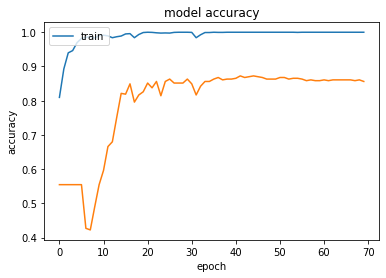

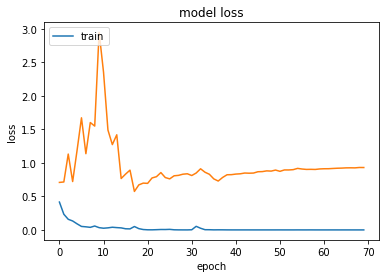

In [31]:
#Plotting the graph of accuracy VS epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [32]:
pip install plot-metric

Note: you may need to restart the kernel to use updated packages.


21/21 [==============================] - 4s 169ms/step
[0 0 0 ... 1 1 1]
[0 0 0 ... 0 0 0]
Confusion Matrix
[[670   0]
 [562   0]]
Classification Report
              precision    recall  f1-score   support

non-melanoma       0.54      1.00      0.70       670
    melanoma       0.00      0.00      0.00       562

    accuracy                           0.54      1232
   macro avg       0.27      0.50      0.35      1232
weighted avg       0.30      0.54      0.38      1232



Text(69.0, 0.5, 'Truth')

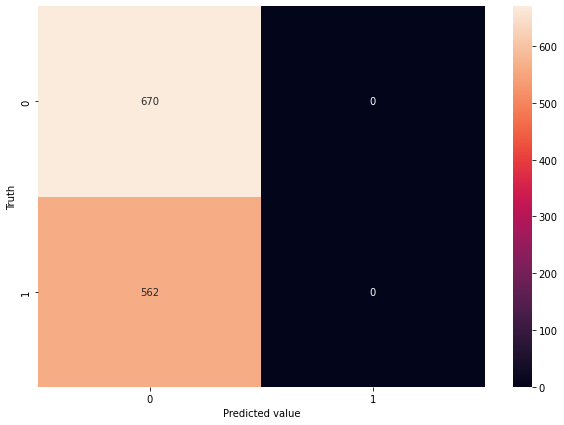

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
B = np.reshape(y_test, (-1, 2))
Y_pred = model.predict([X_test,X_test], 240 // 4)

#print(type(Y_pred))
print(y_test)  
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print('Confusion Matrix')
matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print('Classification Report')
target_names = ['non-melanoma', 'melanoma']
print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Truth')  

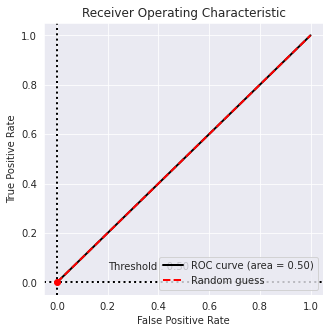

In [34]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
y_true = y_test
y_probas = y_pred
bc = BinaryClassification(y_true, y_probas, labels=['non-melanoma', 'melanoma'])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()